In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/refs/heads/master/Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

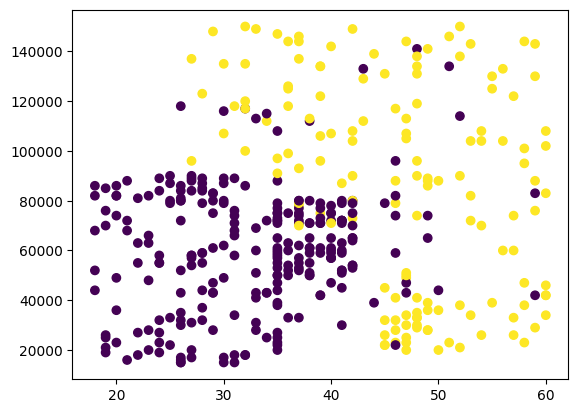

In [5]:
plt.scatter(x=df.loc[:,'Age'], y=df.loc[:,'EstimatedSalary'], c=y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [7]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

C:\Users\pavan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

#### without standardizing the features

In [9]:
model.fit(X_train, y_train, epochs=300, verbose=1)

Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5214 - loss: 834.8208 4
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4448 - loss: 162.2396
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5376 - loss: 102.4211 
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4545 - loss: 46.7300
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 89us/step - accuracy: 0.5317 - loss: 88.4002 
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3848 - loss: 228.3414
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4296 - loss: 200.1015
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.4435 - loss: 221.00160
Epoch 9/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4246 - loss: 136.1824
Epoch 10/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.6289 - loss: 92.8874
Epoch 11/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4816 - loss: 48.9540
Epoch 12/300
10/10 ━━━━━━━━━━━━━━━━━━━

### with standardizing the features

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\pavan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.fit(X_train_scaled, y_train, epochs=300, verbose=1)

Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6065 - loss: 0.6808 
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8519 - loss: 0.6056 
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8320 - loss: 0.5534
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8246 - loss: 0.4928
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8337 - loss: 0.4576
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8632 - loss: 0.4250
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8738 - loss: 0.4068
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8763 - loss: 0.3711
Epoch 9/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8795 - loss: 0.3491
Epoch 10/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8450 - loss: 0.3725 
Epoch 11/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8788 - loss: 0.3186
Epoch 12/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

#### the loss with standardizing the input features is 0.2508. without standardization it was very huge